In [38]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import locale
import scipy.stats as stats

In [39]:
# read the raw csv file(/s)
movie_file = ("Resources/movies_metadata.csv")

In [40]:
#read the movie file and create a dataframe

movie_data_df = pd.read_csv(movie_file)

#list the column types
#movie_data_df.dtypes


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [41]:
#cleanup and filter steps ( budget, revenue , release year)

movie_data_df = movie_data_df.drop(columns=['adult', 'production_countries','belongs_to_collection','homepage','id','imdb_id','overview','poster_path','runtime','spoken_languages','tagline','original_title','video'])

print( f'Inital count of data from file: {len(movie_data_df)}')

clean_movie_data_df = movie_data_df.loc[movie_data_df["budget"] != 0  ]
print( f'count after filtering out $0 budget: {len(clean_movie_data_df)}')

clean_movie_data_df = clean_movie_data_df.loc[clean_movie_data_df["revenue"] != 0  ]
print( f'count after filtering out $0 revenue: {len(clean_movie_data_df)}')

clean_movie_data_df['release_year']= pd.to_datetime(clean_movie_data_df["release_date"]).dt.year 
clean_movie_data_df = clean_movie_data_df.loc[clean_movie_data_df["release_year"] < 2019 ]
print( f'count after filtering out movies in future date: {len(clean_movie_data_df)}')

clean_movie_data_df['net_loss_profit'] = clean_movie_data_df["revenue"] - clean_movie_data_df["budget"]



Inital count of data from file: 45291
count after filtering out $0 budget: 8886
count after filtering out $0 revenue: 5381
count after filtering out movies in future date: 5364


In [82]:
# extract the Genre from the column that has a list of dictionaries
clean_movie_data_df['Primary Genre']=[json.loads(row.genres.replace("'",'"'))[0]['name'] if row.genres != '[]' else '' for _,row in clean_movie_data_df.iterrows()]
clean_movie_data_df = clean_movie_data_df.loc[clean_movie_data_df['Primary Genre']!= ""]
#print(clean_movie_data_df[['revenue','net_loss_profit','Primary Genre', 'release_year', 'title', 'popularity']])



In [43]:
# convert number columns: revenue, budget, net_loss_profit to numeric for sorting purposes
clean_movie_data_df['revenue'] = pd.to_numeric(clean_movie_data_df['revenue'])
clean_movie_data_df['budget'] = pd.to_numeric(clean_movie_data_df['budget'])
clean_movie_data_df['net_loss_profit'] = pd.to_numeric(clean_movie_data_df['net_loss_profit'])
clean_movie_data_df['popularity'] = pd.to_numeric(clean_movie_data_df['popularity'])

# sorting movie by revenue from highest to lowest
sort_by_revenue = clean_movie_data_df.sort_values(by='revenue', ascending = False)

# sorting movie by net profit from highest to lowest
sort_by_netProfit = clean_movie_data_df.sort_values(by='net_loss_profit', ascending = False)

# output csv file sort by revenue data
sort_by_revenue.to_csv("revenue.csv", encoding='utf-8')

# output csv file sort by net profit
sort_by_netProfit.to_csv("net_profit_loss.csv", encoding='utf-8')



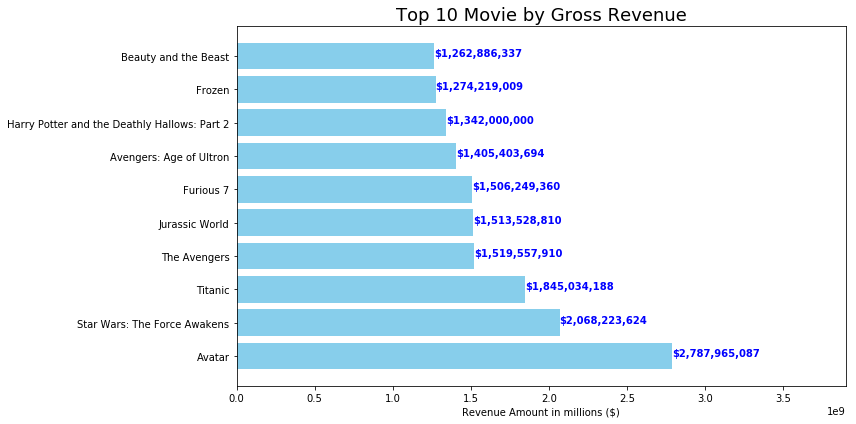

In [84]:
#plot the top 10 movies by revenue

# get the data for plotting the top 10 movies by revenue
top_10_revenue_mv = sort_by_revenue[:10][['title','revenue','Primary Genre']].reset_index()
#print(top_10_revenue_mv)

revenue_value = top_10_revenue_mv.revenue
x_title_labels = top_10_revenue_mv.title

y_rev_pos = np.arange(len(x_title_labels))

plt.figure(figsize=(12,6))
plt.barh(y_rev_pos, revenue_value, align='center', height=0.8, color="skyblue")
plt.yticks(y_rev_pos, x_title_labels)
plt.xlim(0,np.max(revenue_value)*1.4)
plt.xlabel('Revenue Amount in millions ($)')
plt.title('Top 10 Movie by Gross Revenue', fontsize = 18)

for i, v in enumerate(revenue_value):
    plt.text(v + 0.5, i, str(('${:,.0f}'.format(v))), color='blue', fontweight='bold')

plt.tight_layout()
plt.show()


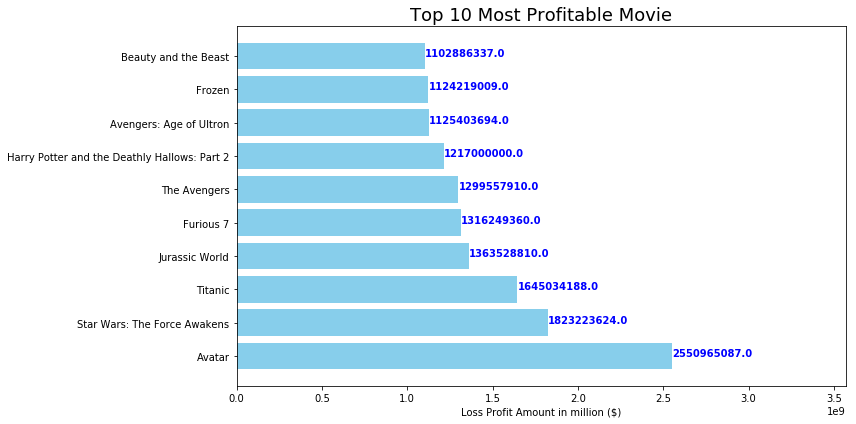

In [46]:
#plot the top 10 movies by net profit

top_10_profitable_mv = sort_by_netProfit[:10][['title','net_loss_profit','Primary Genre']].reset_index()

loss_profit_value = top_10_profitable_mv.net_loss_profit
x_labels = top_10_profitable_mv.title

y_pos = np.arange(len(x_labels))

plt.figure(figsize=(12,6))
plt.barh(y_pos, loss_profit_value, align='center', height=0.8, color="skyblue")
plt.yticks(y_pos, x_labels)
plt.xlim(0,np.max(loss_profit_value)*1.4)
plt.xlabel('Loss Profit Amount in million ($)')
plt.title('Top 10 Most Profitable Movie', fontsize = 18)

for i, v in enumerate(loss_profit_value):
    plt.text(v + 0.5, i, str(v), color='blue', fontweight='bold')

plt.tight_layout()
plt.show()


In [70]:
# create data with only title and primary genre
reduced_data_genre_df = sort_by_revenue[["title", "Primary Genre"]]

reduced_data_genre_df.replace("", "<no genre>", inplace = True)

# get different genre counts
genre_counts = reduced_data_genre_df["Primary Genre"].value_counts()

# Convert the genre_counts Series into a DataFrame
genre_counts_df = pd.DataFrame(genre_counts)

# chisquare changes  start
observed_genre_counts_df = genre_counts_df.copy()
observed_genre_counts_df[1] = 268
observed_genre_counts_df.columns = ["observed" ,"obs_exp"]
# chisquare changes  end 

# Add a column Percentage of Players to the DataFrame and calculate the percentage
genre_counts_df["Percentage_of_Genre"] = ((genre_counts_df["Primary Genre"]/reduced_data_genre_df["Primary Genre"].count())*100).round(2).astype(str) + "%"

genre_counts_df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


,Primary Genre,Percentage_of_Genre
Drama,1308,24.44%
Comedy,1066,19.92%
Action,960,17.94%
Adventure,412,7.7%
Horror,325,6.07%
Crime,265,4.95%
Thriller,199,3.72%
Animation,146,2.73%
Fantasy,140,2.62%
Romance,120,2.24%


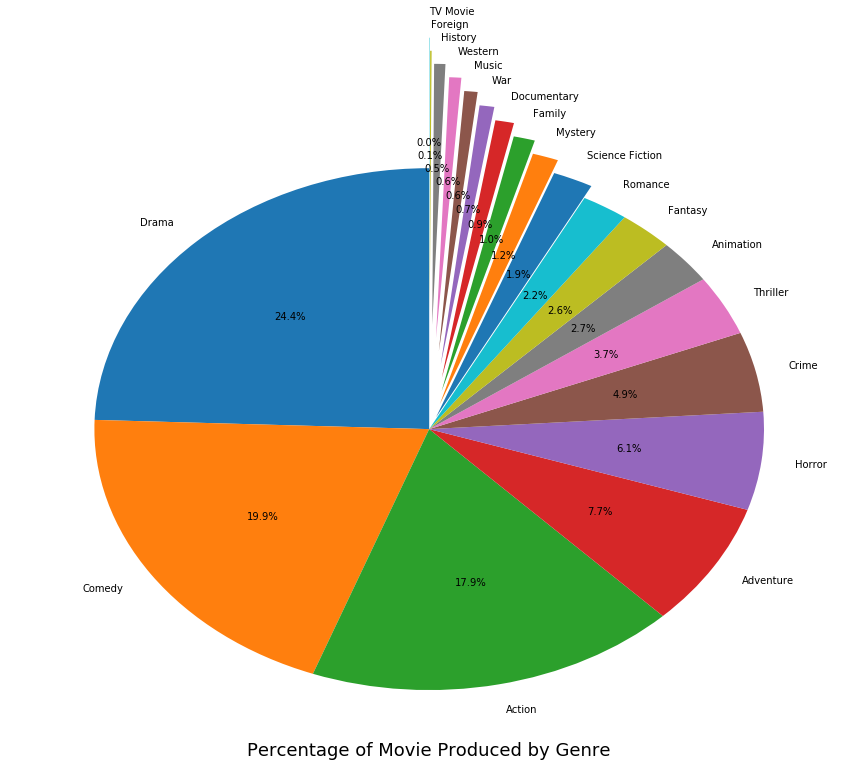

In [85]:
# pie plot to display the percentage of movies produced by Genre
title_list = reduced_data_genre_df["Primary Genre"].value_counts().index.tolist()
value_list = (((genre_counts_df["Primary Genre"]/reduced_data_genre_df["Primary Genre"].count())*100).round(2)).tolist()

fig1, ax1 = plt.subplots(figsize=(15,12))

explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
           0.05, 0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5)
ax1.pie(value_list, labels=title_list, explode = explode, autopct='%1.1f%%',
        startangle=90)


plt.title("Percentage of Movie Produced by Genre", y=-0.01, fontsize = 18)

plt.show()


In [50]:
#df=sort_by_revenue.drop(columns=['budget', 'genres', 'original_language', 'production_companies', 'release_date', 'status', 'release_year', 'popularity', 'vote_average', 'vote_count','net_loss_profit'])
df= sort_by_revenue[['title', 'Primary Genre', 'revenue']]
df

,title,Primary Genre,revenue
14528,Avatar,Action,2.787965e+09
26484,Star Wars: The Force Awakens,Action,2.068224e+09
1637,Titanic,Drama,1.845034e+09
17782,The Avengers,Science Fiction,1.519558e+09
25016,Jurassic World,Action,1.513529e+09
28754,Furious 7,Action,1.506249e+09
26487,Avengers: Age of Ultron,Action,1.405404e+09
17401,Harry Potter and the Deathly Hallows: Part 2,Family,1.342000e+09
22054,Frozen,Animation,1.274219e+09
42070,Beauty and the Beast,Family,1.262886e+09


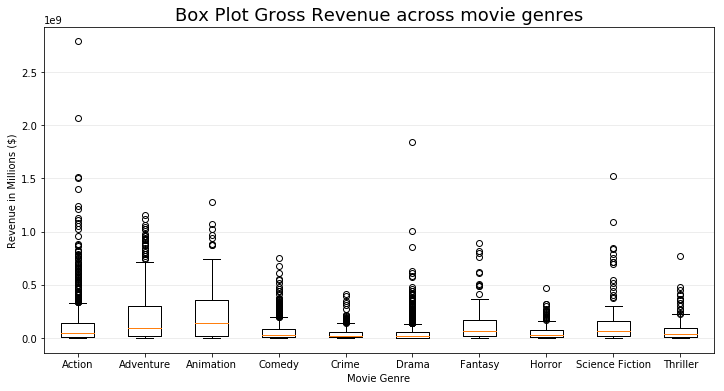

In [51]:


value_action = df.loc[df['Primary Genre'] == 'Action', 'revenue'].tolist()
value_animation = df.loc[df['Primary Genre'] == 'Animation', 'revenue'].tolist()
value_adventure = df.loc[df['Primary Genre'] == 'Adventure', 'revenue'].tolist()
value_comedy = df.loc[df['Primary Genre'] == 'Comedy', 'revenue'].tolist()
value_crime = df.loc[df['Primary Genre'] == 'Crime', 'revenue'].tolist()
value_drama = df.loc[df['Primary Genre'] == 'Drama', 'revenue'].tolist()
value_fantasy = df.loc[df['Primary Genre'] == 'Fantasy', 'revenue'].tolist()
value_horror = df.loc[df['Primary Genre'] == 'Horror', 'revenue'].tolist()
value_science_fiction = df.loc[df['Primary Genre'] == 'Science Fiction', 'revenue'].tolist()
value_thriller = df.loc[df['Primary Genre'] == 'Thriller', 'revenue'].tolist()



fig, ax1 = plt.subplots(figsize=(12, 6))

box_plot_data=[value_action, value_adventure, value_animation, value_comedy, value_crime,
               value_drama, value_fantasy, value_horror, value_science_fiction, value_thriller]

#box_plot_data=[value_action, value_animation]
plt.boxplot(box_plot_data)

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 
                                             'Drama', 'Fantasy', 'Horror', 'Science Fiction', 'Thriller'])

# Add a horizontal grid to the plot, but make it very light in color
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)

ax1.set_title('Box Plot Gross Revenue across movie genres', fontsize = 18)
ax1.set_xlabel('Movie Genre')
ax1.set_ylabel('Revenue in Millions ($)')

plt.show()


In [52]:

print(df.groupby('Primary Genre').describe().T)


Primary Genre        Action     Adventure     Animation        Comedy  \
revenue count  9.600000e+02  4.120000e+02  1.460000e+02  1.066000e+03   
        mean   1.232155e+08  2.006484e+08  2.408561e+08  6.410397e+07   
        std    2.224891e+08  2.566323e+08  2.703053e+08  9.038771e+07   
        min    3.000000e+00  3.000000e+00  7.370600e+04  4.000000e+00   
        25%    1.170458e+07  1.789226e+07  2.325000e+07  7.417020e+06   
        50%    4.511827e+07  9.483515e+07  1.401684e+08  2.995810e+07   
        75%    1.409277e+08  3.013673e+08  3.573437e+08  8.457629e+07   
        max    2.787965e+09  1.153304e+09  1.274219e+09  7.526009e+08   

Primary Genre         Crime   Documentary         Drama        Family  \
revenue count  2.650000e+02  4.800000e+01  1.308000e+03  5.500000e+01   
        mean   4.939538e+07  1.564947e+07  5.165618e+07  2.406010e+08   
        std    6.890931e+07  2.883124e+07  1.000791e+08  3.371376e+08   
        min    3.000000e+00  2.900000e+01  1.00000

In [53]:

stats.f_oneway(value_action, value_adventure, value_animation, value_comedy, value_crime,
               value_drama, value_fantasy, value_horror, value_science_fiction, value_thriller)

F_onewayResult(statistic=61.52666583093743, pvalue=2.4435297663743525e-107)

## One - Way ANOVA tests
The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.
The resulting pvalue was less than 0.05. We can reject the null hypothesis and conclude that there is a significant difference between gross revenue for each movie genre. Even though we have obtained a very low p-value, we cannot make any assumptions about the magnitude of the effect. 

Text(0,0.5,'Average Popularity')

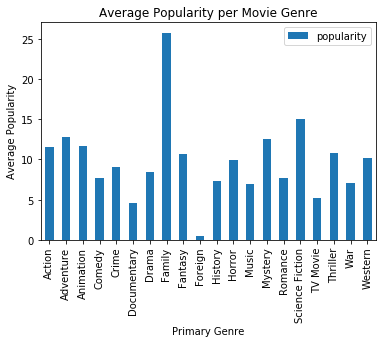

In [54]:
sort_by_revenue.replace("", "<no genre>", inplace = True)
df1 = sort_by_revenue[['title', 'Primary Genre', 'popularity']].groupby('Primary Genre').mean()


#plt.figure(figsize=(20, 10))
ax = df1.plot(kind='bar')
ax.set_title('Average Popularity per Movie Genre')
ax.set_xlabel('Primary Genre')
ax.set_ylabel('Average Popularity')





In [55]:
sort_by_netProfit.groupby("Primary Genre")
sort_by_netProfit

,budget,genres,original_language,popularity,production_companies,release_date,revenue,status,title,vote_average,vote_count,release_year,net_loss_profit,Primary Genre
14528,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,185.070892,"[{'name': 'Ingenious Film Partners', 'id': 289...",12/10/2009,2.787965e+09,Released,Avatar,7.2,12114.0,2009,2.550965e+09,Action
26484,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,31.626013,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Tru...",12/15/2015,2.068224e+09,Released,Star Wars: The Force Awakens,7.5,7993.0,2015,1.823224e+09,Action
1637,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",en,26.889070,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",11/18/1997,1.845034e+09,Released,Titanic,7.5,7770.0,1997,1.645034e+09,Drama
25016,150000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,32.790475,"[{'name': 'Universal Studios', 'id': 13}, {'na...",6/9/2015,1.513529e+09,Released,Jurassic World,6.5,8842.0,2015,1.363529e+09,Action
28754,190000000,"[{'id': 28, 'name': 'Action'}]",en,27.275687,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",4/1/2015,1.506249e+09,Released,Furious 7,7.3,4253.0,2015,1.316249e+09,Action
17782,220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",en,89.887648,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",4/25/2012,1.519558e+09,Released,The Avengers,7.4,12000.0,2012,1.299558e+09,Science Fiction
17401,125000000,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",en,24.990737,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",7/7/2011,1.342000e+09,Released,Harry Potter and the Deathly Hallows: Part 2,7.9,6141.0,2011,1.217000e+09,Family
26487,280000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,37.379420,"[{'name': 'Marvel Studios', 'id': 420}, {'name...",4/22/2015,1.405404e+09,Released,Avengers: Age of Ultron,7.3,6908.0,2015,1.125404e+09,Action
22054,150000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",en,24.248243,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",11/27/2013,1.274219e+09,Released,Frozen,7.3,5440.0,2013,1.124219e+09,Animation
42070,160000000,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",en,287.253654,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",3/16/2017,1.262886e+09,Released,Beauty and the Beast,6.8,5530.0,2017,1.102886e+09,Family


In [56]:
sort_by_netProfit.describe()

,budget,popularity,revenue,vote_average,vote_count,release_year,net_loss_profit
count,5.352000e+03,5352.000000,5.352000e+03,5352.000000,5352.000000,5352.000000,5.352000e+03
mean,3.123683e+07,9.817074,9.076505e+07,6.273655,735.906203,2000.074925,5.952822e+07
std,4.020575e+07,13.841559,1.664726e+08,0.918721,1253.896093,15.216502,1.398380e+08
min,1.000000e+00,0.000001,1.000000e+00,0.000000,0.000000,1930.000000,-1.657101e+08
25%,5.500000e+06,5.499605,7.197850e+06,5.700000,79.000000,1994.000000,-1.502190e+06
50%,1.700000e+07,8.412657,3.003770e+07,6.300000,278.000000,2004.000000,1.120832e+07
75%,4.000000e+07,11.740371,1.000050e+08,6.900000,807.250000,2011.000000,6.305496e+07
max,3.800000e+08,547.488298,2.787965e+09,9.100000,14075.000000,2018.000000,2.550965e+09


# Hasan Changes

In [87]:
#votes to primary genre - hasan
# sorting movie by revenue from highest to lowest
# sort_by_revenue = clean_movie_data_df.sort_values(by='revenue', ascending = False)
sort_by_vote_count = clean_movie_data_df.sort_values(by='vote_count', ascending = False)

# output csv file sort by revenue data
#sort_by_vote_count.to_csv("vote_count_loss.csv", encoding='utf-8')

# print to terminal
sort_by_vote_count.head()

top_10_profitable_mv = sort_by_vote_count[:10][['title','vote_count','Primary Genre']].reset_index()

print(top_10_profitable_mv)

   index                    title  vote_count    Primary Genre
0  15454                Inception     14075.0           Action
1  12466          The Dark Knight     12269.0            Drama
2  14528                   Avatar     12114.0           Action
3  17782             The Avengers     12000.0  Science Fiction
4  26493                 Deadpool     11444.0           Action
5  22820             Interstellar     11187.0        Adventure
6  20004         Django Unchained     10297.0            Drama
7  23693  Guardians of the Galaxy     10014.0           Action
8   2841               Fight Club      9678.0            Drama
9  18205         The Hunger Games      9634.0  Science Fiction


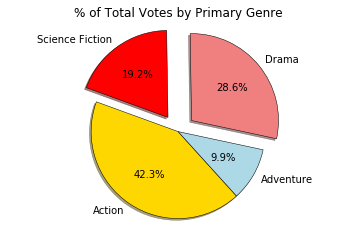

In [88]:
vote_count_sum = top_10_profitable_mv.groupby('Primary Genre').sum()["vote_count"]

labels = vote_count_sum.index
colors = ["gold", "lightblue", "lightcoral","red"]
explode = (0, 0, 0.2,0.2)

plt.title('% of Total Votes by Primary Genre')
plt.axis('equal')

plt.pie(vote_count_sum, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=160,wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.show()

In [89]:
#votes to primary genre - hasan
# sorting movie by revenue from highest to lowest
# sort_by_revenue = clean_movie_data_df.sort_values(by='revenue', ascending = False)
sort_by_popularity = clean_movie_data_df.sort_values(by='popularity', ascending = False)

# output csv file sort by revenue data
#sort_by_vote_count.to_csv("vote_count_loss.csv", encoding='utf-8')

# print to terminal
sort_by_popularity.head()

top_10_popular_mv = sort_by_popularity[:10][['title','popularity','Primary Genre']].reset_index()

print(top_10_popular_mv)

   index                           title  popularity Primary Genre
0  30618                         Minions  547.488298        Family
1  33264                    Wonder Woman  294.337037        Action
2  42070            Beauty and the Beast  287.253654        Family
3  43487                     Baby Driver  228.032744        Action
4  24391                      Big Hero 6  213.849907     Adventure
5  26493                        Deadpool  187.860492        Action
6  26495  Guardians of the Galaxy Vol. 2  185.330992        Action
7  14528                          Avatar  185.070892        Action
8  24287                       John Wick  183.870374        Action
9  23615                       Gone Girl  154.801009       Mystery


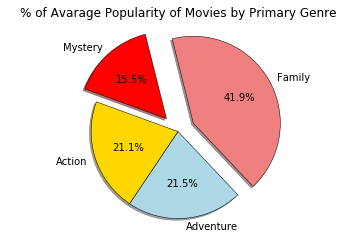

In [90]:
popularity_mean = top_10_popular_mv.groupby('Primary Genre').mean()["popularity"]

labels = popularity_mean.index
colors = ["gold", "lightblue", "lightcoral","red"]
explode = (0, 0, 0.2,0.2)

plt.title('% of Avarage Popularity of Movies by Primary Genre')
plt.axis('equal')

plt.pie(popularity_mean, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=160,wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.show()

In [92]:
# sorting movie by revenue from highest to lowest
# sort_by_revenue = clean_movie_data_df.sort_values(by='revenue', ascending = False)
sort_by_popularity = clean_movie_data_df.sort_values(by='popularity', ascending = False)

# output csv file sort by revenue data
#sort_by_popularity.to_csv("popularity.csv", encoding='utf-8')

# print to terminal
sort_by_popularity.head()

popular_mv = sort_by_popularity[: :][['title','revenue','Primary Genre','popularity']].reset_index()



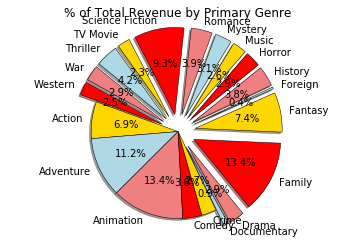

In [94]:
revenue_sum = popular_mv.groupby('Primary Genre').mean()["revenue"]

labels = revenue_sum.index
colors = ["gold", "lightblue", "lightcoral","red"]
explode = (0,0,0,0,0,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2 )

plt.title('% of Total Revenue by Primary Genre')
plt.axis('equal')

plt.pie(revenue_sum, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=160,wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.show()

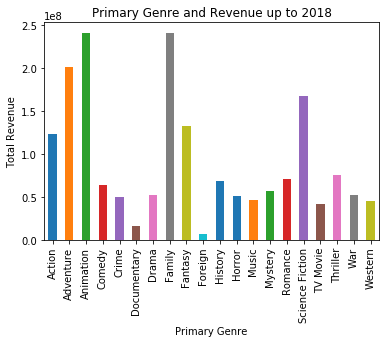

<Figure size 432x288 with 0 Axes>

In [95]:
# bar graph

ax = revenue_sum.plot.bar(x='Primary Genre', y='revenue', rot = 90)

x_axis = np.arange(len(revenue_sum))

tick_locations = [value for value in x_axis]

ax.set_title('Primary Genre and Revenue up to 2018')
ax.set_xlabel('Primary Genre')
ax.set_ylabel('Total Revenue')

plt.show()
plt.tight_layout()

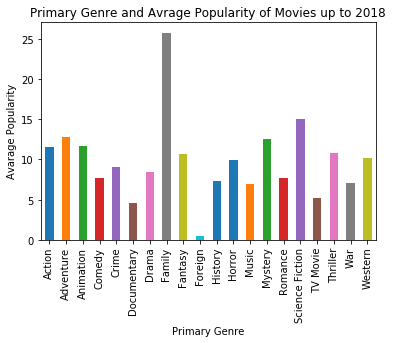

<Figure size 432x288 with 0 Axes>

In [96]:
# bar graph
popularity_mean =popular_mv.groupby('Primary Genre').mean()["popularity"]

ax = popularity_mean.plot.bar(x='Primary Genre', y='popularity', rot = 90)

x_axis = np.arange(len(popularity_mean))

tick_locations = [value for value in x_axis]

ax.set_title('Primary Genre and Avrage Popularity of Movies up to 2018')
ax.set_xlabel('Primary Genre')
ax.set_ylabel('Avarage Popularity')



plt.show()
plt.tight_layout()

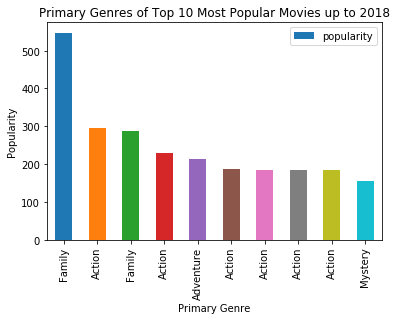

<Figure size 432x288 with 0 Axes>

In [97]:
# bar graph

ax = top_10_popular_mv.plot.bar(x='Primary Genre', y='popularity', rot = 90)

x_axis = np.arange(len(top_10_popular_mv))

tick_locations = [value for value in x_axis]

ax.set_title('Primary Genres of Top 10 Most Popular Movies up to 2018')
ax.set_xlabel('Primary Genre')
ax.set_ylabel('Popularity')




plt.show()
plt.tight_layout()

### Chi Sq test changes

In [57]:
#determine the critical value
critical_value = stats.chi2.ppf(0.95 , 19)
critical_value

30.14352720564616

In [78]:
# get the original movie dataset genre and counts
orig_movie_data_df = movie_data_df.copy()
orig_movie_data_df['Primary_Genre']=[json.loads(row.genres.replace("'",'"'))[0]['name'] if row.genres != '[]' else '' for _,row in orig_movie_data_df.iterrows()]
orig_movie_data_df.replace("Odyssey Media", "", inplace = True)
orig_movie_data_df.replace("Aniplex", "", inplace = True)
orig_movie_data_df.replace("Carousel Productions", "", inplace = True)
orig_movie_data_df = orig_movie_data_df.loc[orig_movie_data_df['Primary_Genre']!= ""]

orig_movie_genre_counts = orig_movie_data_df['Primary_Genre'].value_counts().sort_index()
expected_genre_counts_df = pd.DataFrame(orig_movie_genre_counts)

expected_genre_counts_df[1] = 2147
expected_genre_counts_df.columns = ["expected" ,"exp_exp"]
print(expected_genre_counts_df)


                 expected  exp_exp
Action               4488     2147
Adventure            1514     2147
Animation            1120     2147
Comedy               8801     2147
Crime                1683     2147
Documentary          3390     2147
Drama               11944     2147
Family                524     2147
Fantasy               704     2147
Foreign               118     2147
History               279     2147
Horror               2618     2147
Music                 487     2147
Mystery               552     2147
Romance              1188     2147
Science Fiction       647     2147
TV Movie              390     2147
Thriller             1664     2147
War                   379     2147
Western               451     2147


In [79]:
print( f' chi square b/w cleaned data and original data: {stats.chisquare(observed_genre_counts_df["observed"], expected_genre_counts_df["expected"])}')

 chi square b/w cleaned data and original data: Power_divergenceResult(statistic=34545.146278015905, pvalue=0.0)


In [80]:
print( f' chi square b/w cleaned data and expected data: {stats.chisquare(observed_genre_counts_df["observed"], observed_genre_counts_df["obs_exp"])}')

 chi square b/w cleaned data and expected data: Power_divergenceResult(statistic=10455.940298507465, pvalue=0.0)


In [81]:
print( f' chi square b/w original data and expected data: {stats.chisquare(expected_genre_counts_df["expected"], expected_genre_counts_df["exp_exp"])}')

 chi square b/w original data and expected data: Power_divergenceResult(statistic=83506.9105728924, pvalue=0.0)


In [ ]:
#calculate p value , r2 , coefficient of  - kalyan